In [5]:
%matplotlib inline

In [6]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

----
## INHOUD:

* [AD Conversie](#Analog_Digital_Conversion)
    * [Sampling](#Sampling)
    * [Quantization](#Quantization)
    
----    

------------
## Analog Digital Conversion

Two steps are mandatory in order to do digital processing on analog signals.
![Analog, discrete and digital signals](figures/analog_discrete_digital.png)

---
# Sampling, Aliasing en Nyquist:


### Nyquist (Folding) frequency: $$\dfrac{f_s}{2}$$
### Nyquist rate: $$f_s=2 f_{max}$$
### Nyquist interval: $$\left[-\dfrac{f_s}{2}, \dfrac{f_s}{2}\right]$$

### Nyquist condition: $$f_s \geq 2 f_{max}$$
----

In [7]:
def aliasingExample(fs=2.1,f1=1):

    #fs = 0.9
    T = 1/fs #sampling period

    tstart = 0
    tend = 12

    #t = np.linspace(0,8,801) #for the continuous time signals
    #n = np.linspace(tstart,tend)
    t = np.arange(tstart,tend,1./100) #time axis
    n = np.arange(tstart,tend*fs) #discrete time intervals 

    #f1 = 1 #analog frequency 1 pos=2> neg= <2
    f2 = np.mod(f1,fs) #analog frequency 2

    if f2>fs/2:
        f2 = f2-fs

    w1 = 2*np.pi*f1
    w2 = 2*np.pi*f2

    phi = -.1*np.pi

    def genSig(arg,type='sin'):
        if type == 'cos':
            return np.cos(arg)
        else:
            return np.sin(arg)

    y1 = genSig(w1*t+phi)
    y2 = genSig(w2*t+phi)    
    
    #print("Nyquist frequency {} Hz".format(fs/2))
    
    plt.figure(num=None, figsize=(14,10), dpi=120, facecolor='w', edgecolor='k')
    plt.plot(t,y1, label=str(f1) + ' Hz')
    plt.plot(t,y2, label=str(f2) + ' Hz')

    plt.stem(n*T,genSig(w1*n*T+phi),linefmt='r-', markerfmt='ro', basefmt='r.')

    #plt.scatter(n,np.cos(w2*n*T),marker='.',color='blue',s=200) #digitaal 1.3Hz signaal
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend(loc='best',fontsize='large')
    
#aliasingExample(fs=0.9,f1=1)

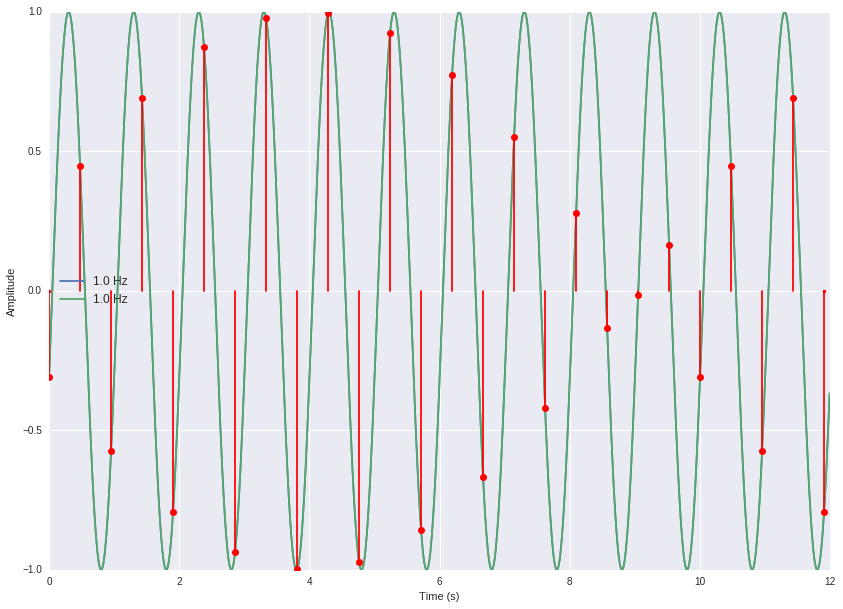

In [8]:
from ipywidgets import interactive

interactive(aliasingExample, fs=(0,3,0.02), f1 = (0,3,0.5))

---